# Time Series Project - monthly housing sales by zip code

## Dataset information

This data represents median monthly housing sales prices for 265 zip codes over the period of April 1996 through April 2018 as reported by Zillow.

Each row represents a unique zip code. Each record contains location info and median housing sales prices for each month.

There are 14,723 rows and 272 variables:

- **_RegionID_**: Unique index, 58196 through 753844
- **_RegionName_**: Unique Zip Code, 1001 through 99901
- **_City_**: City in which the zip code is located
- **_State_**: State in which the zip code is located
- **_Metro_**: Metropolitan Area in which the zip code is located
- **_CountyName_**: County in which the zip code is located
- **_SizeRank_**: Numerical rank of size of zip code, ranked 1 through 14723
- **_1996-04 through 2018-04_**: refers to the median housing sales values for April 1996 through April 2018, that is 265 data points of monthly data for each zip code


Some ideas for exploration:

1. Look at ROI for each zip code, over the whole dataset, avg for each year, 3 year avg, 5 year avg, 10 year avg
2. Plot median sales price against ROI to get quadrants for comparison
3. Which zips have highest and lowest ROI?
4. Business case - choose highest ROI for small investors

## Data Preprocessing

### Import and basic info

**Output** - zillow

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import time
from user_functions import *
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set default visualization parameters

CB91_Blue = '#2CBDFE'
CB91_Green = '#47DBCD'
CB91_Pink = '#F3A0F2'
CB91_Purple = '#9D2EC5'
CB91_Violet = '#661D98'
CB91_Amber = '#F5B14C'
color_list = [CB91_Blue, CB91_Pink, CB91_Green, CB91_Amber, CB91_Purple, CB91_Violet]
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=color_list)
sns.set_context("notebook", rc={"font.size":16, "axes.titlesize":20, "axes.labelsize":18})
sns.set(font='Franklin Gothic Book',
rc={'axes.axisbelow': False,
'axes.edgecolor': 'lightgrey',
# 'axes.edgecolor': 'white',
'axes.facecolor': 'None',
'axes.grid': False,
'axes.labelcolor': 'dimgrey',
# 'axes.labelcolor': 'white',
'axes.spines.right': False,
'axes.spines.top': False,
'axes.prop_cycle': plt.cycler(color=color_list),
'figure.facecolor': 'white',
'lines.solid_capstyle': 'round',
'patch.edgecolor': 'w',
'patch.force_edgecolor': True,
'text.color': 'dimgrey',
# 'text.color': 'white',    
'xtick.bottom': False,
'xtick.color': 'dimgrey',
# 'xtick.color': 'white',    
'xtick.direction': 'out',
'xtick.top': False,
'ytick.color': 'dimgrey',
# 'ytick.color': 'white',
'ytick.direction': 'out',
'ytick.left': False,
'ytick.right': False})
%matplotlib inline

'''font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

# NOTE: if you visualizations are too cluttered to read, try calling 'plt.gcf().autofmt_xdate()'!'''

"font = {'family' : 'normal',\n        'weight' : 'bold',\n        'size'   : 22}\n\nmatplotlib.rc('font', **font)\n\n# NOTE: if you visualizations are too cluttered to read, try calling 'plt.gcf().autofmt_xdate()'!"

In [3]:
zillow = pd.read_csv('zillow_data.csv')
zillow.info()
# I see 4 string object columns, not sure why 49 are int and others float.
# Most column names will be changed to datetime
# Zip codes are actually not continuous so maybe they should be strings
# Don't know if RegionID has any meaning, seems unneeded if zip codes are unique.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Columns: 272 entries, RegionID to 2018-04
dtypes: float64(219), int64(49), object(4)
memory usage: 30.6+ MB


In [4]:
zillow.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


In [5]:
# Data appears to be sorted by SizeRank, largest to smallest
# I see some Nan values in Metro
# And some 4 digit zip codes which I assume should start with a zero
zillow.tail(10)

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
14713,59187,3765,Haverhill,NH,Claremont,Grafton,14714,80800.0,80100.0,79400.0,...,119800,120000,120800,121600,122600,123400,124400,125500,126600,127500
14714,94711,84781,Pine Valley,UT,St. George,Washington,14715,135900.0,136300.0,136600.0,...,241100,243200,244300,248900,254600,257600,258000,260600,264700,266800
14715,62556,12429,Esopus,NY,Kingston,Ulster,14716,78300.0,78300.0,78200.0,...,164200,166600,170000,171000,170700,171300,172400,173600,175800,177500
14716,99032,97028,Rhododendron,OR,Portland,Clackamas,14717,136200.0,136600.0,136800.0,...,332600,332900,335600,338900,340500,341000,342300,345000,348000,349300
14717,62697,12720,Bethel,NY,NaN,Sullivan,14718,62500.0,62600.0,62700.0,...,122200,122700,122300,122000,122200,122800,123200,123200,120700,117700
14718,58333,1338,Ashfield,MA,Greenfield Town,Franklin,14719,94600.0,94300.0,94000.0,...,216800,217700,218600,218500,218100,216400,213100,209800,209200,209300
14719,59107,3293,Woodstock,NH,Claremont,Grafton,14720,92700.0,92500.0,92400.0,...,202100,208400,212200,215200,214300,213100,213700,218300,222700,225800
14720,75672,40404,Berea,KY,Richmond,Madison,14721,57100.0,57300.0,57500.0,...,121800,122800,124600,126700,128800,130600,131700,132500,133000,133400
14721,93733,81225,Mount Crested Butte,CO,NaN,Gunnison,14722,191100.0,192400.0,193700.0,...,662800,671200,682400,695600,695500,694700,706400,705300,681500,664400
14722,95851,89155,Mesquite,NV,Las Vegas,Clark,14723,176400.0,176300.0,176100.0,...,333800,336400,339700,343800,346800,348900,350400,353000,356000,357200


In [6]:
# Can see missing values in Metro
zillow.isna().sum()

RegionID         0
RegionName       0
City             0
State            0
Metro         1043
              ... 
2017-12          0
2018-01          0
2018-02          0
2018-03          0
2018-04          0
Length: 272, dtype: int64

In [7]:
# There will be lots of other missing values in the time series data
zillow.isna().sum().sum()

157934

### Analyze 'RegionID'

All unique, cast to string

In [8]:
# Starting analysis of first variable, RegionID
# 14723 unique values
print(zillow.RegionID.value_counts())
print(zillow.RegionID.nunique())
print(zillow.RegionID.min())
print(zillow.RegionID.max())

73724     1
70551     1
99221     1
76688     1
82829     1
         ..
71176     1
91654     1
65029     1
100380    1
98304     1
Name: RegionID, Length: 14723, dtype: int64
14723
58196
753844


In [9]:
zillow[zillow.RegionID >= 200000]

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
444,417444,85142,Queen Creek,AZ,Phoenix,Pinal,445,117400.0,115500.0,113800.0,...,281200,283700,286200,288200,289900,291700,293700,296300,299700,302200
750,399576,33578,Riverview,FL,Tampa,Hillsborough,751,74700.0,74200.0,73800.0,...,189600,190100,190400,191400,192900,194200,195000,196200,197600,198800
863,417437,85122,Casa Grande,AZ,Phoenix,Pinal,864,82700.0,83500.0,84300.0,...,152600,155000,157200,158400,158700,158900,159300,160400,162600,164700
926,399724,77407,Richmond,TX,Houston,Fort Bend,927,119800.0,119600.0,119700.0,...,247100,247200,247100,247000,246600,246700,247500,248900,249600,249500
1101,399638,78665,Round Rock,TX,Austin,Williamson,1102,160700.0,160300.0,160100.0,...,258000,257400,257700,258400,258900,258900,258900,259500,260100,259900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12263,399644,80927,Colorado Springs,CO,Colorado Springs,El Paso,12264,147800.0,148500.0,149100.0,...,335900,335700,335200,334700,334900,336200,339400,344900,351500,355300
12407,399666,89034,Mesquite,NV,Las Vegas,Clark,12408,196000.0,196000.0,195900.0,...,289400,294500,299800,304700,308100,311700,315500,319500,323600,326600
13498,417445,85145,Marana,AZ,Tucson,Pima,13499,NaN,NaN,NaN,...,141000,143800,145900,146600,147400,148900,150600,151800,152300,152700
14181,399514,3285,Thornton,NH,Claremont,Grafton,14182,92000.0,91800.0,91500.0,...,200500,204900,208600,211600,213200,215000,217100,219500,221500,222400


In [10]:
# It doesn't seem to mean anything and all are unique.  Lets make them strings.
zillow.RegionID = zillow.RegionID.astype('string')

In [11]:
zillow.RegionID.unique()

<StringArray>
['84654', '90668', '91982', '84616', '93144', '91733', '61807', '84640',
 '91940', '97564',
 ...
 '59187', '94711', '62556', '99032', '62697', '58333', '59107', '75672',
 '93733', '95851']
Length: 14723, dtype: string

### Analyze 'Region Name'

**Output** - 

Cast to string, add 0 to 4 digit zip codes

In [12]:
# Now look at RegionName, this is the zip code
zillow.RegionName.value_counts() # 14723 unique values

55324    1
74561    1
73538    1
31546    1
82070    1
        ..
75182    1
55343    1
1450     1
73129    1
65536    1
Name: RegionName, Length: 14723, dtype: int64

In [13]:
# All zip codes are unique.  I will cast to string and add 0 to the four digit one.
zillow.RegionName = zillow.RegionName.astype('string')

In [14]:
for i in range(len(zillow)):
    zillow.RegionName[i] = zillow.RegionName[i].rjust(5, '0')

In [15]:
zillow.RegionName.min()

'01001'

In [16]:
zillow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Columns: 272 entries, RegionID to 2018-04
dtypes: float64(219), int64(47), object(4), string(2)
memory usage: 30.6+ MB


In [17]:
zillow[['RegionName', 'State']].sort_values(by=['RegionName'])

,RegionName,State
5850,01001,MA
4199,01002,MA
11213,01005,MA
6850,01007,MA
14547,01008,MA
...,...,...
4526,99709,AK
8438,99712,AK
4106,99801,AK
8658,99835,AK


### Analyze 'City'



In [18]:
# There are 7554 unique values.
zillow.City.nunique()

7554

### Analyze 'State'



In [19]:
zillow.State.nunique()

51

In [20]:
# Includes DC
zillow.State.unique()

array(['IL', 'TX', 'NY', 'CA', 'FL', 'TN', 'NC', 'GA', 'DC', 'MO', 'OK',
       'AZ', 'NJ', 'MD', 'VA', 'WA', 'OH', 'MI', 'MA', 'KS', 'NM', 'CT',
       'NV', 'PA', 'CO', 'OR', 'IN', 'SC', 'KY', 'AR', 'ND', 'MN', 'AL',
       'DE', 'LA', 'MS', 'ID', 'MT', 'HI', 'WI', 'UT', 'ME', 'SD', 'WV',
       'IA', 'RI', 'NE', 'WY', 'AK', 'NH', 'VT'], dtype=object)

In [21]:
zillow[zillow['State']=='DC']

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
29,66126,20002,Washington,DC,Washington,District of Columbia,30,94300.0,94000.0,93700.0,...,662800,668000,672200,673100,674600,678200,680900,683000,687500,691300
33,66133,20009,Washington,DC,Washington,District of Columbia,34,178800.0,179200.0,179600.0,...,1020000,1027500,1034300,1040500,1047400,1055400,1065900,1076400,1081000,1078200
181,66135,20011,Washington,DC,Washington,District of Columbia,182,118900.0,118500.0,118200.0,...,582200,586200,591200,593200,591200,589500,590800,599100,611400,619100
246,66142,20019,Washington,DC,Washington,District of Columbia,247,91300.0,91000.0,90600.0,...,291100,296300,302500,306700,308800,310800,313400,314100,311800,308600
258,66125,20001,Washington,DC,Washington,District of Columbia,259,92000.0,92600.0,93200.0,...,765000,768800,771200,773300,777600,780500,781600,785500,791400,793300
402,66143,20020,Washington,DC,Washington,District of Columbia,403,104500.0,103800.0,103000.0,...,314700,317600,321800,324500,324800,324900,324900,327300,332800,337000
1263,66132,20008,Washington,DC,Washington,District of Columbia,1264,450100.0,448200.0,446300.0,...,1501600,1508800,1509700,1506000,1509100,1514300,1519400,1527900,1539600,1545900
1448,66127,20003,Washington,DC,Washington,District of Columbia,1449,130000.0,130100.0,130200.0,...,801000,807200,811900,813400,814600,814600,815300,817300,820200,820200
1707,66151,20032,Washington,DC,Washington,District of Columbia,1708,85700.0,85500.0,85400.0,...,288100,293400,297800,301500,303700,304000,304600,306800,308200,307400
2066,66139,20016,Washington,DC,Washington,District of Columbia,2067,362000.0,361200.0,360300.0,...,1202900,1198700,1196400,1190400,1184800,1183600,1186600,1190000,1196000,1199500


### Analyze 'Metro'

Fillna with None

In [22]:
print(zillow.Metro.value_counts())
print(zillow.Metro.nunique())

New York                          779
Los Angeles-Long Beach-Anaheim    347
Chicago                           325
Philadelphia                      281
Washington                        249
                                 ... 
Dodge City                          1
Alice                               1
Eagle Pass                          1
Emporia                             1
Sheridan                            1
Name: Metro, Length: 701, dtype: int64
701


In [23]:
zillow.Metro[151]

nan

In [24]:
zillow.Metro.fillna('None', inplace=True)

In [25]:
zillow.Metro.value_counts()

None                              1043
New York                           779
Los Angeles-Long Beach-Anaheim     347
Chicago                            325
Philadelphia                       281
                                  ... 
North Platte                         1
Wahpeton                             1
Los Alamos                           1
Stephenville                         1
Dickinson                            1
Name: Metro, Length: 702, dtype: int64

### Analyze 'CountyName'



In [26]:
zillow.CountyName.value_counts()

Los Angeles     264
Jefferson       175
Orange          166
Washington      164
Montgomery      159
               ... 
Val Verde         1
Karnes            1
Musselshell       1
Sierra            1
Saint Landry      1
Name: CountyName, Length: 1212, dtype: int64

In [27]:
zillow.CountyName.isna().sum()

0

### Analyze 'SizeRank'



In [28]:
zillow.SizeRank.unique()

array([    1,     2,     3, ..., 14721, 14722, 14723], dtype=int64)

### Analyze missing sales values

In [29]:
# 1039 zip codes don't have full data
zillow[zillow['1996-04'].isna()]

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
20,61625,10011,New York,NY,New York,New York,21,NaN,NaN,NaN,...,12137600,12112600,12036600,12050100,12016300,11946500,11978100,11849300,11563000,11478300
36,61796,10456,New York,NY,New York,Bronx,37,NaN,NaN,NaN,...,357900,357100,356500,357200,362000,368500,374100,379800,388100,394400
105,84613,60611,Chicago,IL,Chicago,Cook,106,NaN,NaN,NaN,...,1475200,1473900,1469500,1472100,1477800,1486000,1497300,1508600,1508100,1493200
156,62048,11238,New York,NY,New York,Kings,157,NaN,NaN,NaN,...,2673300,2696700,2716500,2724000,2744300,2768900,2810700,2848100,2869600,2885300
232,69533,27834,Greenville,NC,Greenville,Pitt,233,NaN,NaN,NaN,...,100100,98700,97400,96100,95900,96300,97000,98300,100200,101200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14703,94323,83821,Coolin,ID,Sandpoint,Bonner,14704,NaN,NaN,NaN,...,550500,550700,542900,539100,547100,555700,561500,558600,547800,540400
14705,79929,49768,Paradise,MI,Sault Ste. Marie,Chippewa,14706,NaN,NaN,NaN,...,86700,86900,87000,87200,87500,88100,88100,87500,86900,86700
14706,59046,03215,Waterville Valley,NH,Claremont,Grafton,14707,NaN,NaN,NaN,...,786000,780900,774100,767800,778300,796800,808100,811600,806500,796600
14707,69681,28039,East Spencer,NC,Charlotte,Rowan,14708,NaN,NaN,NaN,...,27300,26400,25500,25100,25100,25600,25800,26600,27700,28300


In [30]:
# But all zip codes have some data
zillow[zillow['2018-04'].isna()]

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04


In [31]:
# I need to find an ROI that I can compare them all on
# Find the zips with the least data
for col in reversed(zillow.columns):
    if zillow[col].isna().sum() >0:
        print(col)
        break

2014-06


In [32]:
# 56 zip codes only go back to 07-2014
zillow[zillow['2014-06'].isna()]

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
2946,73623,35810,Huntsville,AL,Huntsville,Madison,2947,NaN,NaN,NaN,...,61000,61000,61100,61900,62800,63200,63700,65200,67500,69400
3330,58630,02116,Boston,MA,Boston,Suffolk,3331,NaN,NaN,NaN,...,1931100,1995600,2031100,2049600,2057800,2064500,2037600,2056900,2106500,2136500
6153,73629,35816,Huntsville,AL,Huntsville,Madison,6154,NaN,NaN,NaN,...,61500,62500,62800,63300,64100,65100,66600,68700,70400,71300
7587,78091,46320,Hammond,IN,Chicago,Lake,7588,NaN,NaN,NaN,...,66000,67900,68200,68700,69600,69400,68500,68500,68200,67200
7635,78566,47371,Portland,IN,None,Jay,7636,NaN,NaN,NaN,...,86300,86600,87400,88200,89100,90300,90400,89100,88000,88100
8263,88723,70647,Iowa,LA,Lake Charles,Calcasieu,8264,NaN,NaN,NaN,...,111600,117900,125300,128900,129600,130800,132100,132700,132400,132300
8338,73630,35824,Huntsville,AL,Huntsville,Madison,8339,NaN,NaN,NaN,...,217200,216800,216300,215100,215700,218200,222000,226200,230300,231800
8668,75206,39202,Jackson,MS,Jackson,Hinds,8669,NaN,NaN,NaN,...,152700,154300,155800,157500,158100,158300,158400,157900,156600,155300
8746,90561,74857,Norman,OK,Oklahoma City,Cleveland,8747,NaN,NaN,NaN,...,141800,141800,141700,141700,142000,143600,145600,145700,143900,141900
8780,78097,46327,Hammond,IN,Chicago,Lake,8781,NaN,NaN,NaN,...,75200,74600,73200,72500,72800,73200,72700,72900,74000,74400


## EDA on zip codes

In [33]:
# Create a 4 year ROI since that is the most data we have for some zips
zillow['4_yr_ROI'] = (zillow['2018-04'] - zillow['2014-07'])/(zillow['2014-07'])
zillow['4_yr_ROI']

0        0.154346
1        0.338046
2        0.134847
3        0.119294
4        0.066725
           ...   
14718    0.103903
14719    0.239297
14720    0.280230
14721    0.234256
14722    0.293266
Name: 4_yr_ROI, Length: 14723, dtype: float64

In [34]:
# Lowest values
zillow.sort_values('4_yr_ROI').head()[['RegionName','City','State','4_yr_ROI']]

,RegionName,City,State,4_yr_ROI
11391,54230,Reedsville,WI,-0.388060
12436,45390,Union City,OH,-0.335992
13485,45346,New Madison,OH,-0.282334
13078,53015,Cleveland,WI,-0.265185
4294,45331,Greenville,OH,-0.249827


In [35]:
# Highest values
zillow.sort_values('4_yr_ROI',ascending=False).head()[['RegionName','City','State','4_yr_ROI']]

,RegionName,City,State,4_yr_ROI
13409,27980,Hertford,NC,1.948770
842,30032,Candler-Mcafee,GA,1.489011
6563,15201,Pittsburgh,PA,1.261294
4554,33805,Lakeland,FL,1.233115
6105,37210,Nashville,TN,1.142857


In [36]:
# Check most recent one year ROI
zillow['recent_1_yr_ROI'] = (zillow['2018-04'] - zillow['2017-04'])/(zillow['2017-04'])
zillow['recent_1_yr_ROI']

0        0.041852
1        0.057162
2        0.030937
3        0.019103
4        0.029661
           ...   
14718   -0.010402
14719    0.162120
14720    0.104305
14721    0.121350
14722    0.100092
Name: recent_1_yr_ROI, Length: 14723, dtype: float64

In [37]:
# Lowest values
zillow.sort_values('recent_1_yr_ROI').head()[['RegionName','City','State','recent_1_yr_ROI']]

,RegionName,City,State,recent_1_yr_ROI
14618,66023,Effingham,KS,-0.218135
7286,70583,Scott,LA,-0.197955
11914,71023,Doyline,LA,-0.186260
6445,30642,Greensboro,GA,-0.170560
9457,70090,Vacherie,LA,-0.167689


In [38]:
# Highest values
zillow.sort_values('recent_1_yr_ROI',ascending=False).head()[['RegionName','City','State','recent_1_yr_ROI']]

,RegionName,City,State,recent_1_yr_ROI
4211,07106,Newark,NJ,0.508078
13409,27980,Hertford,NC,0.474385
3285,19601,Reading,PA,0.437500
3540,07103,Newark,NJ,0.435213
4309,29405,North Charleston,SC,0.431034


In [39]:
# Find avg one year ROI over past 3 years
def average_one_year_ROI(df):
    average_one_year_ROI = []
    for i in range(len(df)):
        year_1_ROI = df['recent_1_yr_ROI'][i]
        year_2_ROI = (df.iloc[i,-15] - df.iloc[i,-27])/df.iloc[i,-27]
        year_3_ROI = (df.iloc[i,-27] - df.iloc[i,-39])/df.iloc[i,-39]
        avg_ROI = (year_1_ROI + year_2_ROI + year_3_ROI)/3
        average_one_year_ROI.append(avg_ROI)
    return average_one_year_ROI    

In [40]:
zillow['avg_one_yr_ROI'] = average_one_year_ROI(zillow)

In [41]:
# Lowest values
zillow.sort_values('avg_one_yr_ROI').head()[['RegionName','City','State','avg_one_yr_ROI']]

,RegionName,City,State,avg_one_yr_ROI
11391,54230,Reedsville,WI,-0.135889
12436,45390,Union City,OH,-0.129479
13485,45346,New Madison,OH,-0.109924
13078,53015,Cleveland,WI,-0.103355
4294,45331,Greenville,OH,-0.098901


In [42]:
# Highest values
zillow.sort_values('avg_one_yr_ROI', ascending=False).head()[['RegionName','City','State','avg_one_yr_ROI','2018-04']]

,RegionName,City,State,avg_one_yr_ROI,2018-04
13409,27980,Hertford,NC,0.355009,143900
842,30032,Candler-Mcafee,GA,0.273701,135900
466,19134,Philadelphia,PA,0.268561,46600
1821,28208,Charlotte,NC,0.250809,113400
2661,33705,Saint Petersburg,FL,0.247735,177300


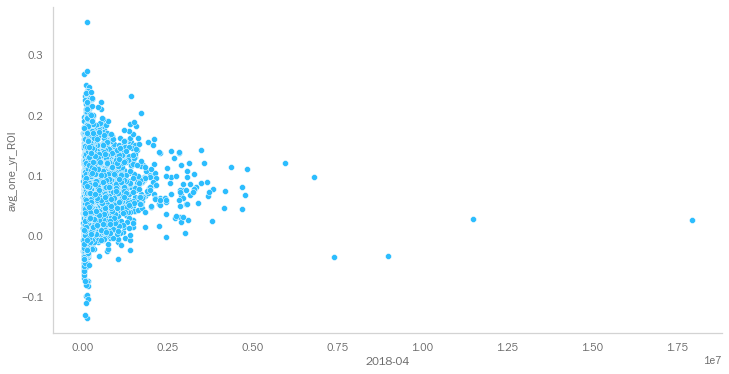

In [43]:
# Plotting median home price versus avg ROI. Some crazy 20 million dollar home values in New York.
plt.figure(figsize = (12,6))
sns.scatterplot(data=zillow, x='2018-04', y='avg_one_yr_ROI')
plt.savefig('Images/scatterplot1.png');

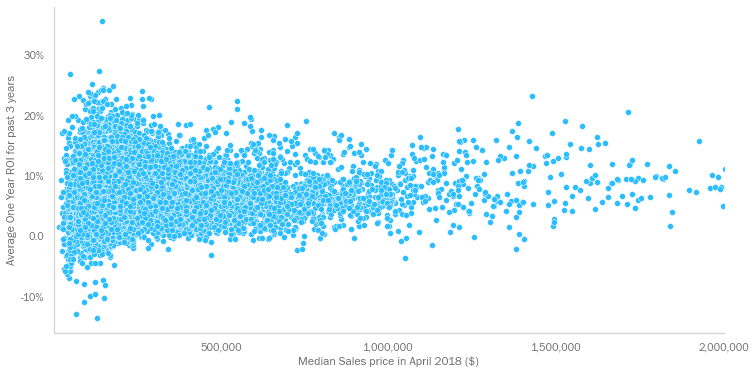

In [44]:
# Eliminate the high outliers
plt.figure(figsize = (12,6))
sns.scatterplot(data=zillow, x='2018-04', y='avg_one_yr_ROI')
plt.xlim(0,2000000)
plt.xticks([500000,1000000,1500000,2000000],['500,000','1,000,000','1,500,000','2,000,000'])
plt.xlabel('Median Sales price in April 2018 ($)')
plt.ylabel('Average One Year ROI for past 3 years')
plt.yticks([-0.10, 0, 0.10, 0.20, 0.30], ['-10%', '0.0', '10%', '20%', '30%'])
plt.savefig('Images/scatterplot2.png');

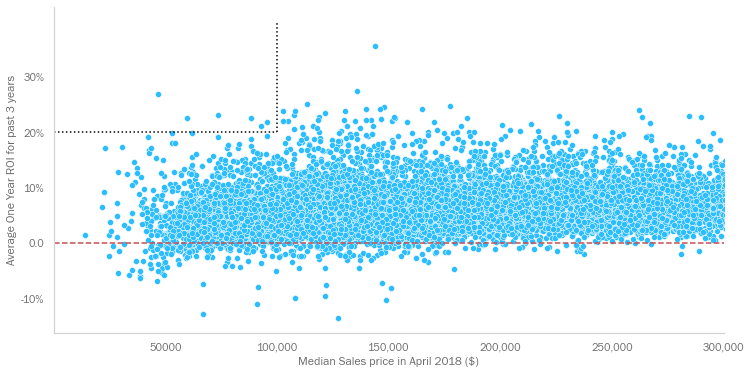

In [45]:
# Further reduce price
# Per my business case, I am looking for highest ROI for small investors
plt.figure(figsize = (12,6))
sns.scatterplot(data=zillow, x='2018-04', y='avg_one_yr_ROI')
plt.xlim(0,300000)
plt.xticks([50000,100000,150000,200000,250000,300000],['50000','100,000','150,000','200,000','250,000','300,000'])
plt.xlabel('Median Sales price in April 2018 ($)')
plt.ylabel('Average One Year ROI for past 3 years')
plt.hlines(0, 0, 300000, color='r', linestyles='dashed')
plt.hlines(.20, 0, 100000, color = 'black', linestyles='dotted')
plt.vlines(100000,.2,.4,color='black', linestyles='dotted')
plt.yticks([-0.10, 0, 0.10, 0.20, 0.30], ['-10%', '0.0', '10%', '20%', '30%'])
plt.savefig('Images/scatterplot3.png');

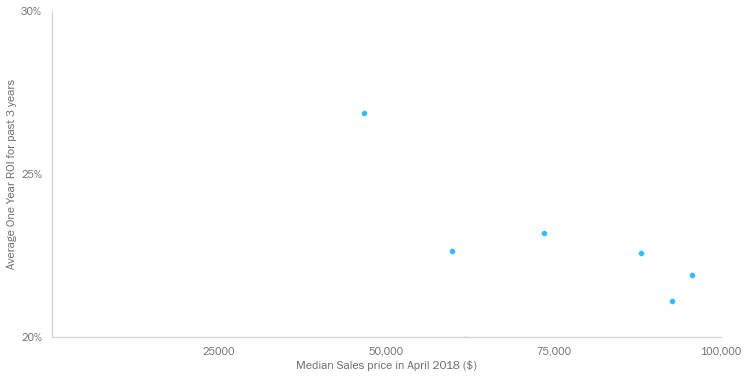

In [46]:
# Zoom in
plt.figure(figsize = (12,6))
sns.scatterplot(data=zillow, x='2018-04', y='avg_one_yr_ROI')
plt.xlim(0,100000)
plt.ylim(.20,.30)
plt.xticks([25000, 50000,75000,100000],['25000','50,000','75,000','100,000'])
plt.xlabel('Median Sales price in April 2018 ($)')
plt.ylabel('Average One Year ROI for past 3 years')
# plt.hlines(0, 0, 300000, color='r', linestyles='dashed')
# plt.hlines(.20, 0, 100000, color = 'black', linestyles='dotted')
# plt.vlines(100000,.2,.4,color='black', linestyles='dotted')
plt.yticks([0.20, 0.25, 0.30], ['20%', '25%', '30%'])
plt.savefig('Images/scatterplot4.png');

## Subset data on top zip codes

In [47]:
# Choose zips with 'current' price under $100,000 and avg ROI greater than 20%
zillow_top = zillow[(zillow['2018-04'] < 100000) & (zillow['avg_one_yr_ROI'] > 0.20)]
zillow_top

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,4_yr_ROI,recent_1_yr_ROI,avg_one_yr_ROI
466,65801,19134,Philadelphia,PA,Philadelphia,Philadelphia,467,27600.0,27500.0,27500.0,...,39600,40600,41600,42600,44000,45700,46600,0.834646,0.259459,0.268561
1754,78022,46203,Indianapolis,IN,Indianapolis,Marion,1755,NaN,NaN,NaN,...,67000,66600,67400,69200,70600,71800,73500,1.047354,0.137771,0.231818
2199,71793,32114,Daytona Beach,FL,Daytona Beach,Volusia,2200,47700.0,48000.0,48300.0,...,85500,86700,87900,89000,90400,91900,92600,0.909278,0.169192,0.210909
3853,76575,43206,Columbus,OH,Columbus,Franklin,3854,NaN,NaN,NaN,...,69400,71800,75700,78800,81300,84500,88100,0.984234,0.409600,0.225806
4293,87104,66104,Kansas City,KS,Kansas City,Wyandotte,4294,41300.0,41200.0,41200.0,...,51600,54200,55700,55700,55900,57800,59800,0.986711,0.300000,0.226380
5682,74373,37411,Chattanooga,TN,Chattanooga,Hamilton,5683,54800.0,55000.0,55200.0,...,87400,89200,90500,91700,93500,95000,95600,0.623090,0.283221,0.219015


In [48]:
zillow_top[['RegionName', 'City','State','Metro', 'SizeRank','2018-04','avg_one_yr_ROI']]

,RegionName,City,State,Metro,SizeRank,2018-04,avg_one_yr_ROI
466,19134,Philadelphia,PA,Philadelphia,467,46600,0.268561
1754,46203,Indianapolis,IN,Indianapolis,1755,73500,0.231818
2199,32114,Daytona Beach,FL,Daytona Beach,2200,92600,0.210909
3853,43206,Columbus,OH,Columbus,3854,88100,0.225806
4293,66104,Kansas City,KS,Kansas City,4294,59800,0.226380
5682,37411,Chattanooga,TN,Chattanooga,5683,95600,0.219015


## Clustering?  

What info does this really give me?

## Convert to date types

In [49]:
# Function provided in starter notebook
def get_datetimes(df):
    return pd.to_datetime(df.columns.values[:], format='%Y-%m')

In [50]:
# These are my date columns only.  Running them through the function.
zillow_top_date_df = zillow_top.iloc[:,7:-3]
zillow_top_date_df.columns = list(get_datetimes(zillow_top_date_df))
zillow_top_date_df

,1996-04-01,1996-05-01,1996-06-01,1996-07-01,1996-08-01,1996-09-01,1996-10-01,1996-11-01,1996-12-01,1997-01-01,...,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01
466,27600.0,27500.0,27500.0,27400.0,27400.0,27300.0,27300.0,27200.0,27200.0,27300.0,...,39000,39100,39100,39600,40600,41600,42600,44000,45700,46600
1754,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,66700,66700,66900,67000,66600,67400,69200,70600,71800,73500
2199,47700.0,48000.0,48300.0,48400.0,48500.0,48500.0,48500.0,48400.0,48400.0,48400.0,...,82300,83300,84300,85500,86700,87900,89000,90400,91900,92600
3853,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,67600,68600,68800,69400,71800,75700,78800,81300,84500,88100
4293,41300.0,41200.0,41200.0,41100.0,41000.0,40800.0,40700.0,40500.0,40500.0,40500.0,...,47300,47900,49700,51600,54200,55700,55700,55900,57800,59800
5682,54800.0,55000.0,55200.0,55400.0,55700.0,55900.0,56200.0,56400.0,56700.0,57000.0,...,82300,84500,85800,87400,89200,90500,91700,93500,95000,95600


In [51]:
# Now put the df back together, 7 info columns, 3 feature columns of ROI calculation, then date columns.
zillow_top_date = pd.concat([zillow_top.iloc[:, :7], zillow_top.iloc[:, -3:], zillow_top_date_df], axis=1)
zillow_top_date

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,4_yr_ROI,recent_1_yr_ROI,avg_one_yr_ROI,...,2017-07-01 00:00:00,2017-08-01 00:00:00,2017-09-01 00:00:00,2017-10-01 00:00:00,2017-11-01 00:00:00,2017-12-01 00:00:00,2018-01-01 00:00:00,2018-02-01 00:00:00,2018-03-01 00:00:00,2018-04-01 00:00:00
466,65801,19134,Philadelphia,PA,Philadelphia,Philadelphia,467,0.834646,0.259459,0.268561,...,39000,39100,39100,39600,40600,41600,42600,44000,45700,46600
1754,78022,46203,Indianapolis,IN,Indianapolis,Marion,1755,1.047354,0.137771,0.231818,...,66700,66700,66900,67000,66600,67400,69200,70600,71800,73500
2199,71793,32114,Daytona Beach,FL,Daytona Beach,Volusia,2200,0.909278,0.169192,0.210909,...,82300,83300,84300,85500,86700,87900,89000,90400,91900,92600
3853,76575,43206,Columbus,OH,Columbus,Franklin,3854,0.984234,0.409600,0.225806,...,67600,68600,68800,69400,71800,75700,78800,81300,84500,88100
4293,87104,66104,Kansas City,KS,Kansas City,Wyandotte,4294,0.986711,0.300000,0.226380,...,47300,47900,49700,51600,54200,55700,55700,55900,57800,59800
5682,74373,37411,Chattanooga,TN,Chattanooga,Hamilton,5683,0.623090,0.283221,0.219015,...,82300,84500,85800,87400,89200,90500,91700,93500,95000,95600


In [52]:
zillow_top_date.isna().sum().sum()

324

## Reshape from wide to long format

In [53]:
# Create a separate data frame for each of the 6 top zip codes.
Philly = zillow_top_date[zillow_top_date['RegionName']=='19134']
Indy = zillow_top_date[zillow_top_date['RegionName']=='46203']
Daytona = zillow_top_date[zillow_top_date['RegionName']=='32114']
Columbus = zillow_top_date[zillow_top_date['RegionName']=='43206']
KC = zillow_top_date[zillow_top_date['RegionName']=='66104']
Chattanooga = zillow_top_date[zillow_top_date['RegionName']=='37411']

In [54]:
# Columbus and Indy have missing data.  I don't want to back fill multiple years worth of data.
# I'd rather slice off what I have and backfill only occasional missing data
Indy.isna().sum().sum()

111

In [55]:
Indy.columns[Indy.isnull().any()] # Indy begins recording data at 2005-07-01

Index([1996-04-01 00:00:00, 1996-05-01 00:00:00, 1996-06-01 00:00:00,
       1996-07-01 00:00:00, 1996-08-01 00:00:00, 1996-09-01 00:00:00,
       1996-10-01 00:00:00, 1996-11-01 00:00:00, 1996-12-01 00:00:00,
       1997-01-01 00:00:00,
       ...
       2004-09-01 00:00:00, 2004-10-01 00:00:00, 2004-11-01 00:00:00,
       2004-12-01 00:00:00, 2005-01-01 00:00:00, 2005-02-01 00:00:00,
       2005-03-01 00:00:00, 2005-04-01 00:00:00, 2005-05-01 00:00:00,
       2005-06-01 00:00:00],
      dtype='object', length=111)

In [56]:
Columbus.columns[Columbus.isnull().any()] # Columbus begins recording data at 2014-01-01

Index([1996-04-01 00:00:00, 1996-05-01 00:00:00, 1996-06-01 00:00:00,
       1996-07-01 00:00:00, 1996-08-01 00:00:00, 1996-09-01 00:00:00,
       1996-10-01 00:00:00, 1996-11-01 00:00:00, 1996-12-01 00:00:00,
       1997-01-01 00:00:00,
       ...
       2013-03-01 00:00:00, 2013-04-01 00:00:00, 2013-05-01 00:00:00,
       2013-06-01 00:00:00, 2013-07-01 00:00:00, 2013-08-01 00:00:00,
       2013-09-01 00:00:00, 2013-10-01 00:00:00, 2013-11-01 00:00:00,
       2013-12-01 00:00:00],
      dtype='object', length=213)

In [57]:
Indy_notnull = Indy[Indy.columns.drop(Indy.columns[Indy.isnull().any()])]
Columbus_notnull = Columbus[Columbus.columns.drop(Columbus.columns[Columbus.isnull().any()])]

In [58]:
Indy_notnull

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,4_yr_ROI,recent_1_yr_ROI,avg_one_yr_ROI,...,2017-07-01 00:00:00,2017-08-01 00:00:00,2017-09-01 00:00:00,2017-10-01 00:00:00,2017-11-01 00:00:00,2017-12-01 00:00:00,2018-01-01 00:00:00,2018-02-01 00:00:00,2018-03-01 00:00:00,2018-04-01 00:00:00
1754,78022,46203,Indianapolis,IN,Indianapolis,Marion,1755,1.047354,0.137771,0.231818,...,66700,66700,66900,67000,66600,67400,69200,70600,71800,73500


In [59]:
def melt_data(list_of_dfs): # changed to take in a list of dataframes for scalability
    """Convert list of time series dataframes into melted format"""
    return_list = []
    for df in list_of_dfs:
        melted = pd.melt(df, id_vars=['RegionID','RegionName', 'City', 'State', 'Metro', 'CountyName',
                                     'SizeRank', '4_yr_ROI', 'recent_1_yr_ROI','avg_one_yr_ROI'], var_name='time')
        melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
#         melted = melted.dropna(subset=['value'])
        melted = melted.bfill() # I'm adding this to try backfill instead of dropna
        return_list.append(melted.groupby('time').aggregate({'value':'mean'}))
    return return_list

In [60]:
zips_to_melt = [Philly, Indy_notnull, Daytona, Columbus_notnull, KC, Chattanooga]
Philly_melted, Indy_melted, Daytona_melted, Columbus_melted, KC_melted, Chattanooga_melted = melt_data(zips_to_melt)

Indy_melted

,value
time,
2005-07-01,73600.0
2005-08-01,74700.0
2005-09-01,75700.0
2005-10-01,76600.0
2005-11-01,77200.0
...,...
2017-12-01,67400.0
2018-01-01,69200.0
2018-02-01,70600.0


## Visualize time series plots

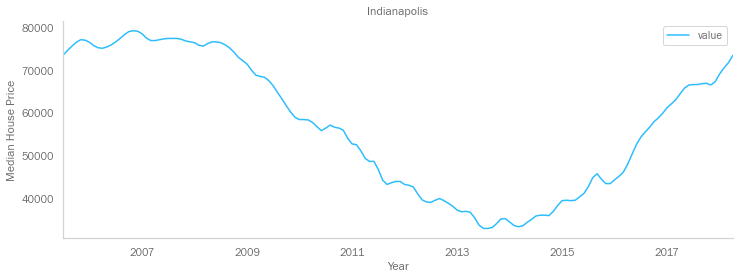

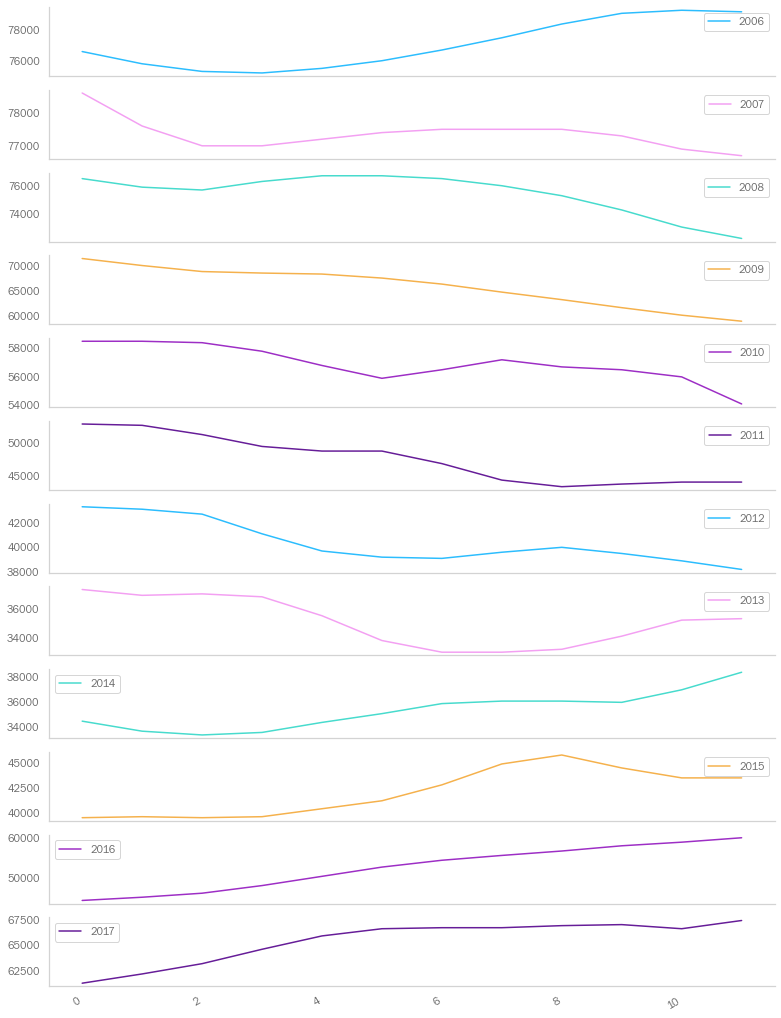

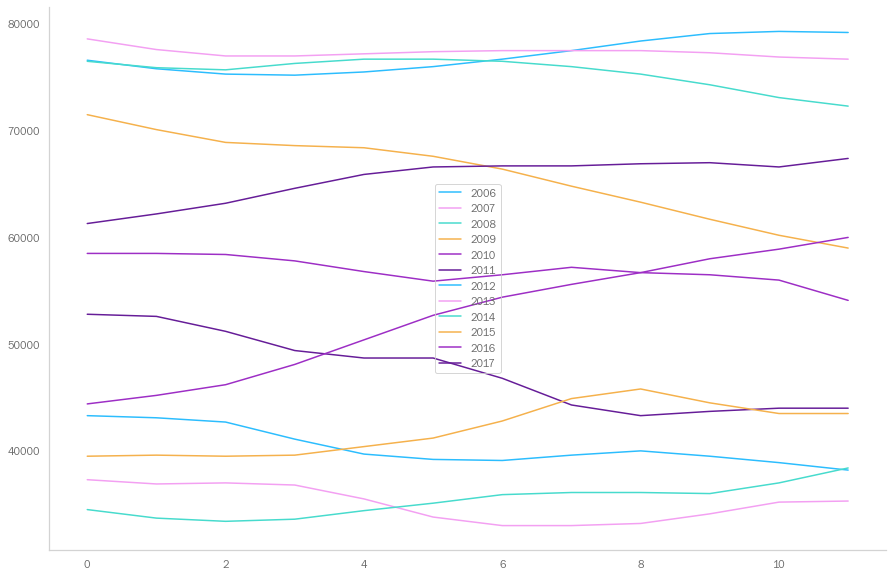

In [61]:
visualize_time_series(Indy_melted, 'Indianapolis') # functioned defined in user_functions.py

# I don't really find the annual breakout graphs to be that helpful for visualization

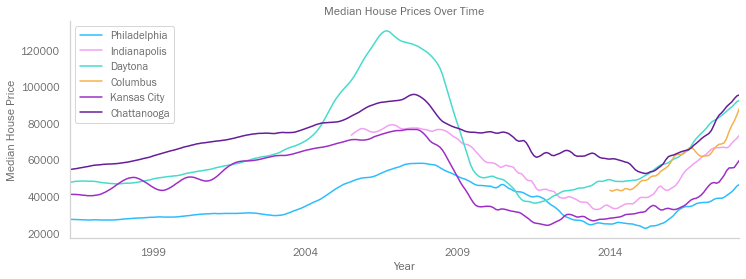

In [62]:
# Plot all 6 chosen zip codes together
all_dfs = [Philly_melted, Indy_melted, Daytona_melted, Columbus_melted, KC_melted, Chattanooga_melted]
names = ['Philadelphia','Indianapolis','Daytona','Columbus','Kansas City','Chattanooga']
visualize_all_series(all_dfs, names) # Function defined in user_functions.py

## Checking for trends, stationarity, seasonality

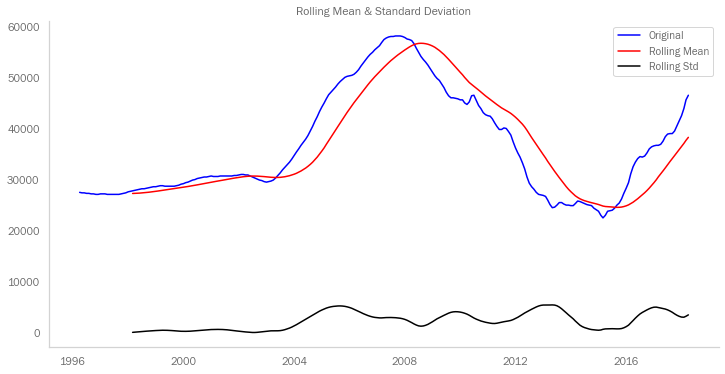

Results of Dickey-Fuller Test: 

Test Statistic                  -0.288166
p-value                          0.927164
#Lags Used                       0.000000
Number of Observations Used    264.000000
Critical Value (1%)             -3.455365
Critical Value (5%)             -2.872551
Critical Value (10%)            -2.572638
dtype: float64


In [63]:
stationarity_check(Philly_melted) # Function defined in user_functions.py
# p-value is greater than .05 (it is .927!) so the series is not stationary

In [64]:
#See what differencing does
data_diff = Philly_melted.diff(periods=1)
data_diff.head(10)

,value
time,
1996-04-01,NaN
1996-05-01,-100.0
1996-06-01,0.0
1996-07-01,-100.0
1996-08-01,0.0
1996-09-01,-100.0
1996-10-01,0.0
1996-11-01,-100.0
1996-12-01,0.0


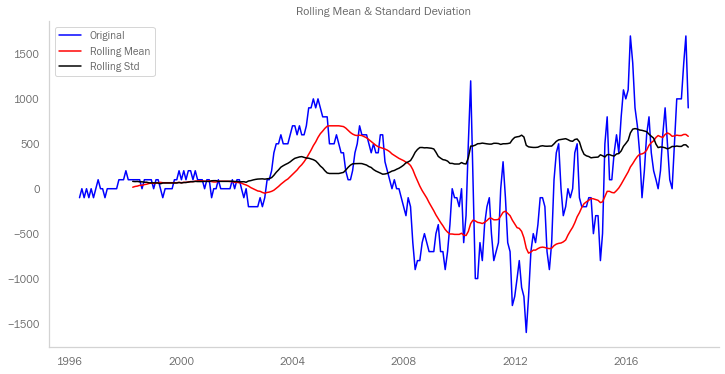

Results of Dickey-Fuller Test: 

Test Statistic                  -2.422182
p-value                          0.135573
#Lags Used                       8.000000
Number of Observations Used    255.000000
Critical Value (1%)             -3.456257
Critical Value (5%)             -2.872942
Critical Value (10%)            -2.572846
dtype: float64


In [65]:
stationarity_check(data_diff[1:])
# p-value is down to .13 but still not stationary

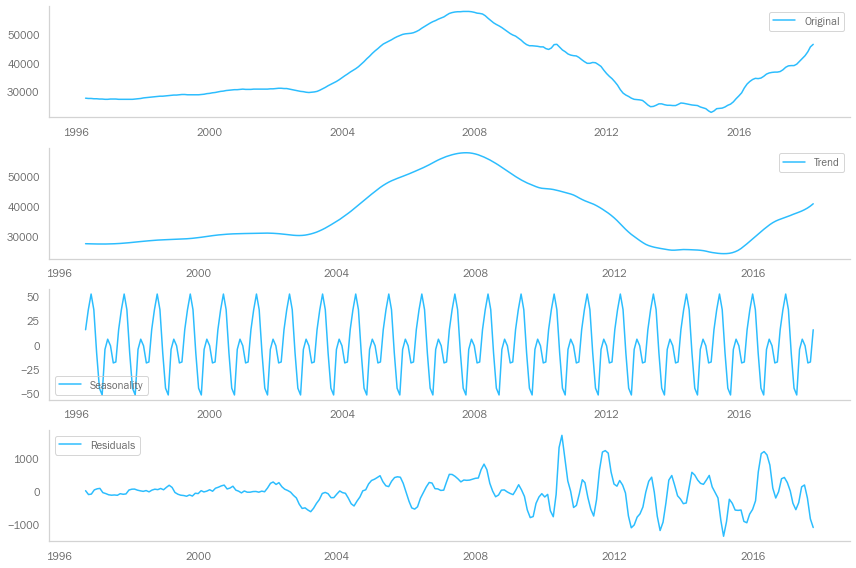

In [66]:
# Import and apply seasonal_decompose()
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(Philly_melted)#(np.log(Philly_melted))

# Gather the trend, seasonality, and residuals 
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(Philly_melted, label='Original')#np.log(ts)
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.savefig('Images/decomposition.png')
plt.tight_layout()

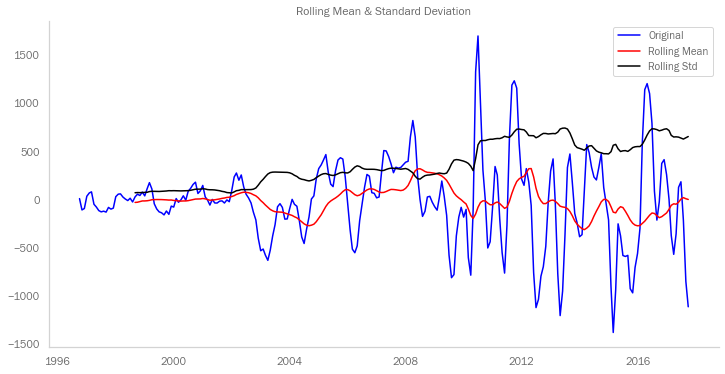

Results of Dickey-Fuller Test: 

Test Statistic                -5.795867e+00
p-value                        4.753722e-07
#Lags Used                     8.000000e+00
Number of Observations Used    2.440000e+02
Critical Value (1%)           -3.457438e+00
Critical Value (5%)           -2.873459e+00
Critical Value (10%)          -2.573122e+00
dtype: float64


In [67]:
# Drop missing values from residuals 
Philly_residuals = residual
Philly_residuals.dropna(inplace=True)

# Check stationarity
stationarity_check(Philly_residuals)

# Although the std dev still appears to be trending upward, the p-value indicates stationarity

In [68]:
# To check correlation lets concat all series together
df_group = pd.concat(all_dfs, axis=1)
df_group.columns = names
df_group.corr()

# Highly correlated but they are not stationary at this point

,Philadelphia,Indianapolis,Daytona,Columbus,Kansas City,Chattanooga
Philadelphia,1.000000,0.928714,0.788810,0.937542,0.568138,0.856833
Indianapolis,0.928714,1.000000,0.869279,0.933518,0.898426,0.928332
Daytona,0.788810,0.869279,1.000000,0.936875,0.829742,0.864986
Columbus,0.937542,0.933518,0.936875,1.000000,0.901098,0.882271
Kansas City,0.568138,0.898426,0.829742,0.901098,1.000000,0.777869
Chattanooga,0.856833,0.928332,0.864986,0.882271,0.777869,1.000000


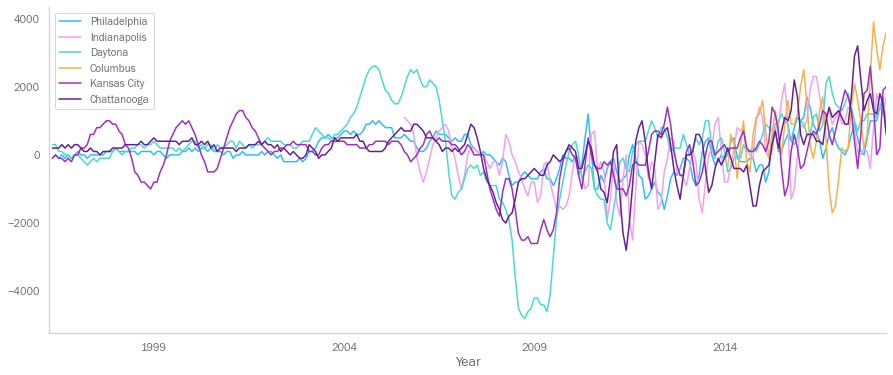

In [69]:
# Let's difference them all then check correlation again
df_group_diff = df_group.diff(periods=1)
df_group_diff.plot(figsize=(15,6))
plt.xlabel('Year', fontsize=14)
plt.savefig('Images/zips_differenced.png');

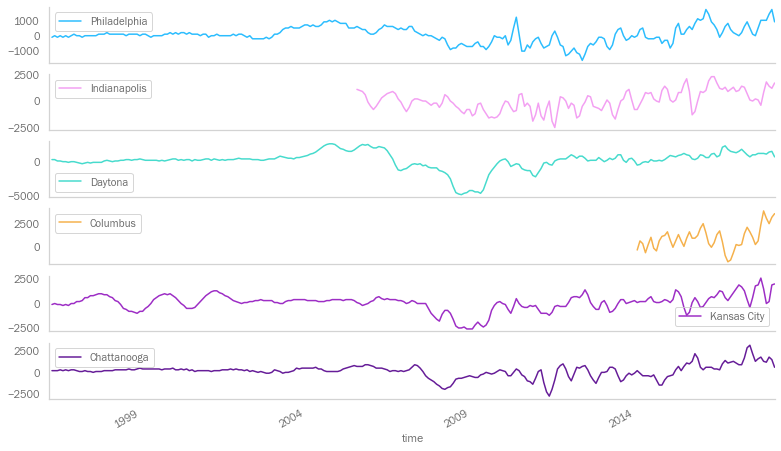

In [70]:
df_group_diff.plot(figsize=(13,8), subplots=True, legend=True)
plt.savefig('Images/differenced_subplots.png');

In [71]:
df_group_diff.corr() # Less correlated when they are differenced 1 period

,Philadelphia,Indianapolis,Daytona,Columbus,Kansas City,Chattanooga
Philadelphia,1.000000,0.448357,0.521212,0.457200,0.404639,0.490092
Indianapolis,0.448357,1.000000,0.462218,0.103327,0.436716,0.324999
Daytona,0.521212,0.462218,1.000000,0.008467,0.689288,0.487852
Columbus,0.457200,0.103327,0.008467,1.000000,0.132253,0.233762
Kansas City,0.404639,0.436716,0.689288,0.132253,1.000000,0.461135
Chattanooga,0.490092,0.324999,0.487852,0.233762,0.461135,1.000000


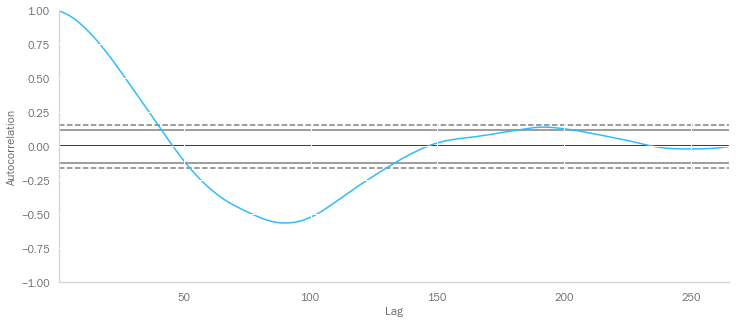

In [72]:
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(Philly_melted);
# Don't see spikes for yearly correlations

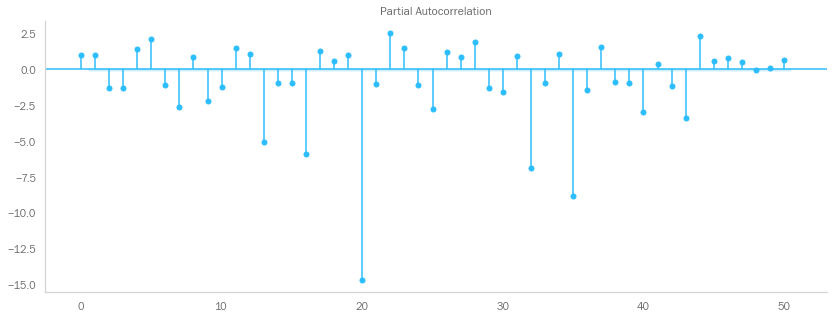

In [73]:
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 14, 5

plot_pacf(Philly_melted, lags=50);

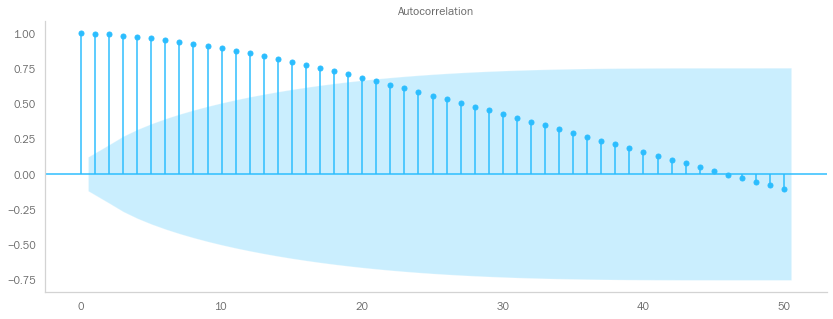

In [74]:
from statsmodels.graphics.tsaplots import plot_acf

rcParams['figure.figsize'] = 14, 5

plot_acf(Philly_melted, lags=50);

## Train Test Split

In [75]:
# My times series have different lengths, some are very short
# I will split the testing data to be 20% of the data, rather than a particular time period
# Function takes in a list for scalability
# We already created the list and names for a previous function

def test_split(list_of_df, names):
    return_list=[]
    for i, df in enumerate(list_of_df):
        test_nobs=int((len(df))*.20)
        training_data = df[:-(test_nobs)]
        test_data = df[-(test_nobs):]
        return_list.extend([training_data, test_data])
        print(names[i], ': ', df.shape, 'Train: ', training_data.shape, 'Test: ', test_data.shape)
    return return_list

Philly_train, Philly_test, Indy_train, Indy_test, Daytona_train, Daytona_test, \
    Columbus_train, Columbus_test, KC_train, KC_test, Chattanooga_train, Chattanooga_test = test_split(all_dfs, names)


Philadelphia :  (265, 1) Train:  (212, 1) Test:  (53, 1)
Indianapolis :  (154, 1) Train:  (124, 1) Test:  (30, 1)
Daytona :  (265, 1) Train:  (212, 1) Test:  (53, 1)
Columbus :  (52, 1) Train:  (42, 1) Test:  (10, 1)
Kansas City :  (265, 1) Train:  (212, 1) Test:  (53, 1)
Chattanooga :  (265, 1) Train:  (212, 1) Test:  (53, 1)


In [76]:
Columbus_test

,value
time,
2017-07-01,67600.0
2017-08-01,68600.0
2017-09-01,68800.0
2017-10-01,69400.0
2017-11-01,71800.0
2017-12-01,75700.0
2018-01-01,78800.0
2018-02-01,81300.0
2018-03-01,84500.0


In [77]:
# Making lists to run through models together
all_train_df = [Philly_train, Indy_train, Daytona_train, Columbus_train, KC_train, Chattanooga_train]
all_test_df = [Philly_test, Indy_test, Daytona_test, Columbus_test, KC_test, Chattanooga_test]

## Baseline ARIMA modeling

<pre>
    Name              Order    Seasonal_Order  Fit_Time  Const      ar.L1   ma.L1   sigma2      AIC Score  
0   Philadelphia    (1, 0, 1)   (0, 0, 0, 0)    0.1486   37780.63   0.9988  0.7558   97088.02   3052.12  
1   Indianapolis    (1, 0, 1)   (0, 0, 0, 0)    0.0847   56479.04   0.9978  0.8006  328214.33   1942.49  
2   Daytona         (1, 0, 1)   (0, 0, 0, 0)    0.1257   67303.44   0.9976  0.9998  595867.81   3441.25  
3   Columbus        (1, 0, 1)   (0, 0, 0, 0)    0.0449   54592.93   0.9933  0.9996  399308.60    678.30  
4   Kansas City     (1, 0, 1)   (0, 0, 0, 0)    0.1685   51062.20   0.9988  0.8923  207501.13   3213.95  
5   Chattanooga     (1, 0, 1)   (0, 0, 0, 0)    0.1785   72549.00   0.9988  0.8112  145217.65   3137.79  
</pre>

In [79]:
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

# Establish a metrics dataframe to store models
column_metrics = ['Name', 'Order', 'Seasonal_Order', 'Fit_Time', 
                  'Const', 'ar.L1', 'ma.L1', 'sigma2', 'AIC Score']
metrics_df = pd.DataFrame(columns = column_metrics)

# Start with a baseline model of AR(1) and MA(1)
order=(1,0,1)

for i, train_df in enumerate(all_train_df):
    metrics_df = run_arima_models(names[i], train_df, all_test_df[i], order, metrics_df) # Function in user_functions.py

metrics_df

,Name,Order,Seasonal_Order,Fit_Time,Const,ar.L1,ma.L1,sigma2,AIC Score
0,Philadelphia,"(1, 0, 1)","(0, 0, 0, 0)",0.1820,37780.63,0.9988,0.7558,97088.02,3052.12
1,Indianapolis,"(1, 0, 1)","(0, 0, 0, 0)",0.0932,56479.04,0.9978,0.8006,328214.33,1942.49
2,Daytona,"(1, 0, 1)","(0, 0, 0, 0)",0.1263,67303.44,0.9976,0.9998,595867.81,3441.25
3,Columbus,"(1, 0, 1)","(0, 0, 0, 0)",0.0459,54592.93,0.9933,0.9996,399308.60,678.30
4,Kansas City,"(1, 0, 1)","(0, 0, 0, 0)",0.1655,51062.20,0.9988,0.8923,207501.13,3213.95
5,Chattanooga,"(1, 0, 1)","(0, 0, 0, 0)",0.2077,72549.00,0.9988,0.8112,145217.65,3137.79


In [80]:
# So those are our baseline model metric above.  Now figure out how to predict, perhaps print predictions.
# Then do grid search type optimization or auto-arima
# Maybe try Facebook Prophet

# Lets grid search and then only calculate preds on top model

## Find Optimal p,d,q

### Philly

<pre>
pdq         (1, 2, 1)
pdqs    (1, 2, 2, 12)
aic                12
Name: 447, dtype: object
</pre>

In [97]:
tic=time.time()
Philly_grid_search = grid_search_arima(Philly_train) # Function in user_functions.py
print(time.time()-tic)

pdq         (1, 2, 1)
pdqs    (1, 2, 2, 12)
aic                12
Name: 447, dtype: object
749.6724972724915


In [98]:
Philly_grid_search.loc[Philly_grid_search['aic'].idxmin()]

pdq         (1, 2, 1)
pdqs    (1, 2, 2, 12)
aic                12
Name: 447, dtype: object

In [99]:
Philly_grid_search

,pdq,pdqs,aic
0,"(0, 0, 0)","(0, 0, 0, 12)",5458.559871
1,"(0, 0, 0)","(0, 0, 1, 12)",4308.780846
2,"(0, 0, 0)","(0, 0, 2, 12)",4152.884715
3,"(0, 0, 0)","(0, 1, 0, 12)",3981.858558
4,"(0, 0, 0)","(0, 1, 1, 12)",3959.558732
...,...,...,...
722,"(2, 2, 2)","(2, 1, 1, 12)",2727.079333
723,"(2, 2, 2)","(2, 1, 2, 12)",2730.192964
724,"(2, 2, 2)","(2, 2, 0, 12)",2722.410806
725,"(2, 2, 2)","(2, 2, 1, 12)",2713.148786


In [81]:
Philly_model = ARIMA(Philly_train, order=(1,2,1), seasonal_order=(1,2,2,12), freq='MS')
Philly_results = Philly_model.fit()
print(Philly_results.aic)

12.0


### Indy

<pre>
pdq         (2, 0, 0)
pdqs    (0, 2, 1, 12)
aic                 8
Name: 491, dtype: object
</pre>

In [101]:
tic=time.time()
Indy_grid_search = grid_search_arima(Indy_train)
print(time.time()-tic)

pdq         (2, 0, 0)
pdqs    (0, 2, 1, 12)
aic                 8
Name: 491, dtype: object
479.2594051361084


In [102]:
Indy_grid_search.loc[Indy_grid_search['aic'].idxmin()]

pdq         (2, 0, 0)
pdqs    (0, 2, 1, 12)
aic                 8
Name: 491, dtype: object

In [103]:
Indy_model = ARIMA(Indy_train, order=(2,0,0), seasonal_order=(0,2,1,12), freq='MS')
Indy_results = Indy_model.fit()
print(Indy_results.aic)

8.0


In [104]:
Indy_grid_search.iloc[480:495]

,pdq,pdqs,aic
480,"(1, 2, 2)","(2, 1, 2, 12)",1813.110935
481,"(1, 2, 2)","(2, 2, 0, 12)",1690.182906
482,"(1, 2, 2)","(2, 2, 1, 12)",1672.806759
483,"(1, 2, 2)","(2, 2, 2, 12)",1674.012364
484,"(2, 0, 0)","(0, 0, 0, 12)",1948.026872
485,"(2, 0, 0)","(0, 0, 1, 12)",1949.975914
486,"(2, 0, 0)","(0, 0, 2, 12)",1950.906039
487,"(2, 0, 0)","(0, 1, 0, 12)",2219.186060
488,"(2, 0, 0)","(0, 1, 1, 12)",2271.494169
489,"(2, 0, 0)","(0, 1, 2, 12)",2269.939629


### Daytona

<pre>
pdq         (1, 0, 0)
pdqs    (2, 1, 0, 12)
aic                 8
Name: 264, dtype: object
</pre>

In [105]:
tic=time.time()
Daytona_grid_search = grid_search_arima(Daytona_train)
print(time.time()-tic)

pdq         (1, 0, 0)
pdqs    (2, 1, 0, 12)
aic                 8
Name: 264, dtype: object
745.36954164505


In [106]:
Daytona_grid_search.loc[Daytona_grid_search['aic'].idxmin()]

pdq         (1, 0, 0)
pdqs    (2, 1, 0, 12)
aic                 8
Name: 264, dtype: object

In [107]:
Daytona_grid_search

,pdq,pdqs,aic
0,"(0, 0, 0)","(0, 0, 0, 12)",5871.077122
1,"(0, 0, 0)","(0, 0, 1, 12)",4844.319083
2,"(0, 0, 0)","(0, 0, 2, 12)",4846.900968
3,"(0, 0, 0)","(0, 1, 0, 12)",4442.782493
4,"(0, 0, 0)","(0, 1, 1, 12)",4414.261210
...,...,...,...
719,"(2, 2, 2)","(2, 1, 1, 12)",2877.928705
720,"(2, 2, 2)","(2, 1, 2, 12)",2880.173889
721,"(2, 2, 2)","(2, 2, 0, 12)",2877.856768
722,"(2, 2, 2)","(2, 2, 1, 12)",2858.673924


In [108]:
Daytona_model = ARIMA(Daytona_train, order=(1,0,0), seasonal_order=(2,1,0,12), freq='MS')
Daytona_results = Daytona_model.fit()
print(Daytona_results.aic)

8.0


### Columbus

<pre>
pdq         (1, 0, 0)
pdqs    (2, 1, 0, 12)
aic                 8
Name: 264, dtype: object
</pre>

In [82]:
tic=time.time()
Columbus_grid_search = grid_search_arima(Columbus_train)
print(time.time()-tic)

pdq         (1, 0, 0)
pdqs    (2, 1, 0, 12)
aic                 8
Name: 264, dtype: object
242.10668849945068


In [83]:
Columbus_grid_search.loc[Columbus_grid_search['aic'].idxmin()]

pdq         (1, 0, 0)
pdqs    (2, 1, 0, 12)
aic                 8
Name: 264, dtype: object

In [84]:
Columbus_model = ARIMA(Columbus_train, order=(1,0,0), seasonal_order=(2,1,0,12), freq='MS')
Columbus_results = Columbus_model.fit()
print(Columbus_results.aic)

8.0


### KC

<pre>
pdq         (2, 0, 0)
pdqs    (0, 2, 0, 12)
aic                 6
Name: 491, dtype: object
</pre>

In [85]:
tic=time.time()
KC_grid_search = grid_search_arima(KC_train)
print(time.time()-tic)

pdq         (2, 0, 0)
pdqs    (0, 2, 0, 12)
aic                 6
Name: 491, dtype: object
760.8471736907959


In [86]:
KC_grid_search.loc[KC_grid_search['aic'].idxmin()]

pdq         (2, 0, 0)
pdqs    (0, 2, 0, 12)
aic                 6
Name: 491, dtype: object

In [87]:
KC_grid_search.aic.describe()

count     725.000000
mean     3160.053730
std       471.551855
min         6.000000
25%      2893.362208
50%      3071.204559
75%      3262.457475
max      5635.297774
Name: aic, dtype: float64

In [88]:
KC_model = ARIMA(KC_train, order=(2,0,0), seasonal_order=(0,2,0,12), freq='MS')
KC_results = KC_model.fit()
print(KC_results.aic)

6.0


### Chattanooga

<pre>
pdq         (1, 0, 1)
pdqs    (2, 1, 0, 12)
aic                10
Name: 290, dtype: object
</pre>

In [89]:
tic=time.time()
Chattanooga_grid_search = grid_search_arima(Chattanooga_train)
print(time.time()-tic)

pdq         (1, 0, 1)
pdqs    (2, 1, 0, 12)
aic                10
Name: 290, dtype: object
696.2108774185181


In [90]:
Chattanooga_grid_search.loc[Chattanooga_grid_search['aic'].idxmin()]

pdq         (1, 0, 1)
pdqs    (2, 1, 0, 12)
aic                10
Name: 290, dtype: object

In [95]:
Chattanooga_model = ARIMA(Chattanooga_train, order=(1,0,1), seasonal_order=(2,1,0,12), freq='MS')
Chattanooga_results = Chattanooga_model.fit()
print(Chattanooga_results.aic)

# mod = sm.tsa.statespace.SARIMAX(Chattanooga_train, order=(1,0,1), seasonal_order=(2,1,0,12))
# res = mod.fit(disp=False)
# print(res.summary())

10.0


In [96]:
Chattanooga_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                             value   No. Observations:                  212
Model:             ARIMA(1, 0, 1)x(2, 1, [], 12)   Log Likelihood                   0.000
Date:                           Tue, 26 Jan 2021   AIC                             10.000
Time:                                   12:32:17   BIC                             26.492
Sample:                               04-01-1996   HQIC                            16.674
                                    - 11-01-2013                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0000         -0        inf      0.000      -1.000      -1.000
ma.L1         -0.9933   1.12e-08  -8.88e+07      0.000      -0.993      -0.993
ar.S.L12     1.16e-05         -0       -inf      0.000    1.16e-05    1.16e-05
ar.S.L24       1.0000         -0       -inf      0.000       1.000       1.000
sigma2      9.409e+08   2.15e-19   4.37e+27      0.000    9.41e+08    9.41e+08
===================================================================================
Ljung-Box (L1) (Q):                    nan   Jarque-Bera (JB):                75.00
Prob(Q):                               nan   Prob(JB):                         0.00
Heteroskedasticity (H):                nan   Skew:                             0.00
Prob(H) (two-sided):                   nan   Kurtosis:                         0.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

## Visualize predictions for top models

In [93]:
def run_preds_and_plot(model_results, train, test, name):
    pred = model_results.get_prediction(start = test.index[0], end = test.index[-1], dynamic=True, full_results=True)
    pred_forecast = model_results.get_forecast(start = test.index[0], end = test.index[-1], dynamic=True, full_results=True)
    pred_conf = pred.conf_int()
    
    print('pred', pred)
    print('pred forecast', pred_forecast)
    print('pred conf', pred_conf)
    print('pred.predicted_mean', pred.predicted_mean)
    
    all_data = pd.concat([train, test], axis=1)
    ax = all_data.plot(label='observed', figsize=(10, 5))
    pred.predicted_mean.plot(label='Dynamic Forecast', ax=ax)
    ax.fill_between(pred_conf.index,
                    pred_conf.iloc[:, 0],
                    pred_conf.iloc[:, 1], color='g', alpha=.3)
    ax.fill_betweenx(ax.get_ylim(), test.index[0], test.index[-1], alpha=.1, zorder=-1)
    ax.set_xlabel('Date')
    ax.set_ylabel('Median House Prices')
    plt.legend()
    imagename=str("Images/"+name+"pred.png")
    plt.savefig(imagename)
    plt.show()
    
    return pred

In [94]:
Philly_pred = run_preds_and_plot(Philly_results, Philly_train, Philly_test, 'Philadelphia')

TypeError: get_prediction() got multiple values for keyword argument 'start'

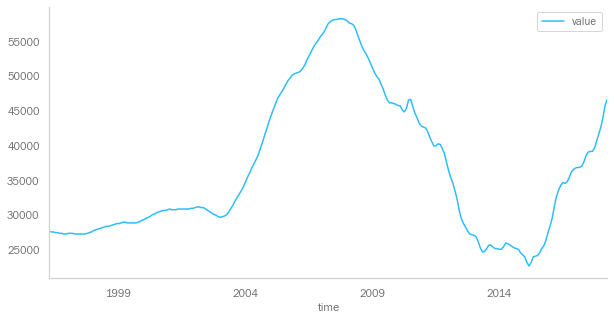

In [88]:
ax = Philly_melted.plot(label='observed', figsize=(10, 5))

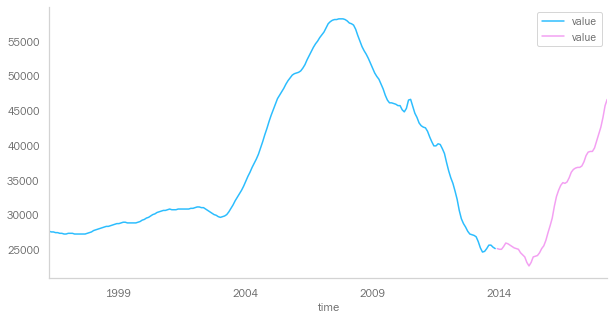

In [89]:
all_data = pd.concat([Philly_train, Philly_test], axis=1)
ax = all_data.plot(label='observed', figsize=(10, 5))

## Calculate test prediction error

In [90]:
# Get the real and predicted values
Philly_forecasted = Philly_pred.predicted_mean
# Philly_truth = Philly['1998-01-01':]  Think I just need test here

# Compute the mean squared error
mse = ((Philly_forecasted - Philly_test) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 2013-12-01 00:00:00   NaN
2014-01-01 00:00:00   NaN
2014-02-01 00:00:00   NaN
2014-03-01 00:00:00   NaN
2014-04-01 00:00:00   NaN
2014-05-01 00:00:00   NaN
2014-06-01 00:00:00   NaN
2014-07-01 00:00:00   NaN
2014-08-01 00:00:00   NaN
2014-09-01 00:00:00   NaN
2014-10-01 00:00:00   NaN
2014-11-01 00:00:00   NaN
2014-12-01 00:00:00   NaN
2015-01-01 00:00:00   NaN
2015-02-01 00:00:00   NaN
2015-03-01 00:00:00   NaN
2015-04-01 00:00:00   NaN
2015-05-01 00:00:00   NaN
2015-06-01 00:00:00   NaN
2015-07-01 00:00:00   NaN
2015-08-01 00:00:00   NaN
2015-09-01 00:00:00   NaN
2015-10-01 00:00:00   NaN
2015-11-01 00:00:00   NaN
2015-12-01 00:00:00   NaN
2016-01-01 00:00:00   NaN
2016-02-01 00:00:00   NaN
2016-03-01 00:00:00   NaN
2016-04-01 00:00:00   NaN
2016-05-01 00:00:00   NaN
2016-06-01 00:00:00   NaN
2016-07-01 00:00:00   NaN
2016-08-01 00:00:00   NaN
2016-09-01 00:00:00   NaN
2016-10-01 00:00:00   NaN
2016-11-01 00:00:00   NaN
2016-12-01 00:00:00  

## Interpret Results / Conclusions

## Review Top Performers

In [ ]:
metrics_df[['Model','Train_Accuracy', 'Test_Accuracy', 'Train_F1', 'Test_F1']].sort_values('Test_Accuracy')

## Conclusions

 XGBoost appears to be our best performing model.  However, there are so many questions about the validity of the missing data placeholders and the arrest flag prior to 2019, I think the process may need to be begun again.